In [22]:
%matplotlib inline
import tensorflow as tf

tf.enable_eager_execution()

In [5]:
x = tf.zeros([10, 10])
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [10]:
v = tf.Variable(1.)
assert v.numpy() == 1.

v.assign(3.)
assert v.numpy() == 3.

v.assign(tf.square(v))
assert v.numpy() == 9.

In [16]:
class Model:
    
    def __init__(self):
        self.W = tf.Variable(5.)
        self.b = tf.Variable(0.)
        
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()
assert model(3.).numpy() == 15.

In [18]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [20]:
TRUE_W = 3.
TRUE_b = 2.
NUM_EXAMPLES= 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = TRUE_W * inputs + TRUE_b + noise

Current loss: 
8.596537


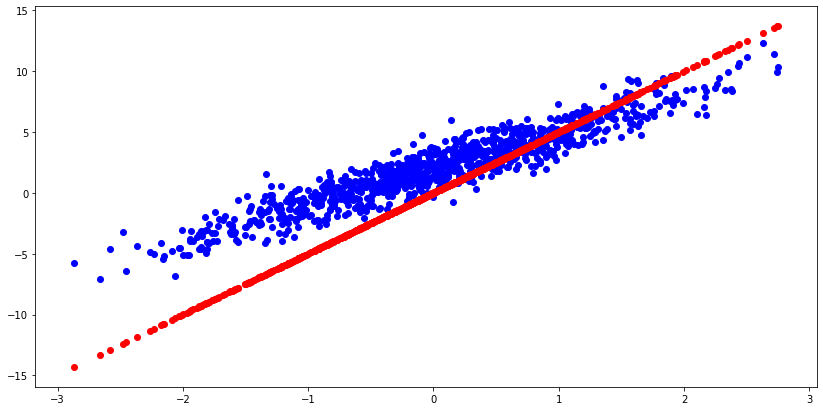

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

In [25]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.59654
Epoch 10: W=3.26 b=1.77, loss=1.12900
Epoch 20: W=3.04 b=1.98, loss=1.01671
Epoch 30: W=3.01 b=2.00, loss=1.01500
Epoch 40: W=3.00 b=2.00, loss=1.01498


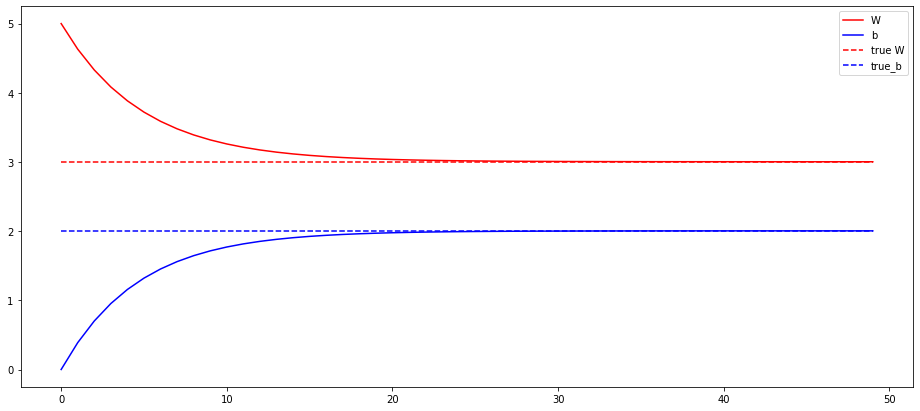

In [30]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(50)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    if epoch % 10 == 0:
        print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.figure(figsize=(16, 7))
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])